In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv' ,encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
806,ham,"sure, but make sure he knows we ain't smokin yet",NaN,NaN,NaN
1867,ham,Mmmm ... Fuck ... Not fair ! You know my weakn...,NaN,NaN,NaN
4227,ham,Have you started in skye,NaN,NaN,NaN
4696,ham,"Okey dokey, iÛ÷ll be over in a bit just sorti...",NaN,NaN,NaN
2300,ham,Nothin comes to my mind. ÌÏ help me buy hanger...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data  cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping columns unnamed2, unnamed3 , unnamed 4 
df.drop(columns = ['Unnamed: 2' ,'Unnamed: 3' ,  'Unnamed: 4'], inplace = True)

In [7]:
df.sample(2)

,v1,v2
4569,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...
4502,ham,Stupid.its not possible


In [8]:
#Renaming the columns

df.rename(columns = {'v1' :'target' , 'v2': 'text'} , inplace = True)
df.sample()

,target,text
1960,spam,Guess what! Somebody you know secretly fancies...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.sample(5)

,target,text
5050,0,With my sis lor... We juz watched italian job.
5056,0,Hey next sun 1030 there's a basic yoga course....
3247,0,Also track down any lighters you can find
2643,0,Hi! You just spoke to MANEESHA V. We'd like to...
4578,0,No plans yet. What are you doing ?


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# checking for duplicates
df.duplicated().sum()


403

In [14]:
#removing duplicates
df = df.drop_duplicates(keep = 'first')

In [15]:
df.duplicated().sum()

0

# EDA

Now we ll perform some EDA to check and get familiar with data to get some meaningful insights

In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

# As we can clearly see dataset we are working on is very imbalanced and also in real world the num of spam mails a user recieving will be less.

([<matplotlib.patches.Wedge at 0x237f3d6ce90>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

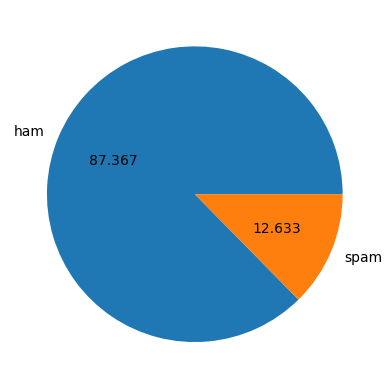

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'],autopct = '%0.3f' )

In [19]:
#Data is imbalaced


# Importing libraries for text preprocessing

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANDEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#ferching no of characters
df['num_characters'] = df['text'].apply(len)

In [24]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
#no of sentences
df['num_sentences'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [26]:
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['target'] == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0.5, 0, 'num_characters , red = spam and blue = ham')

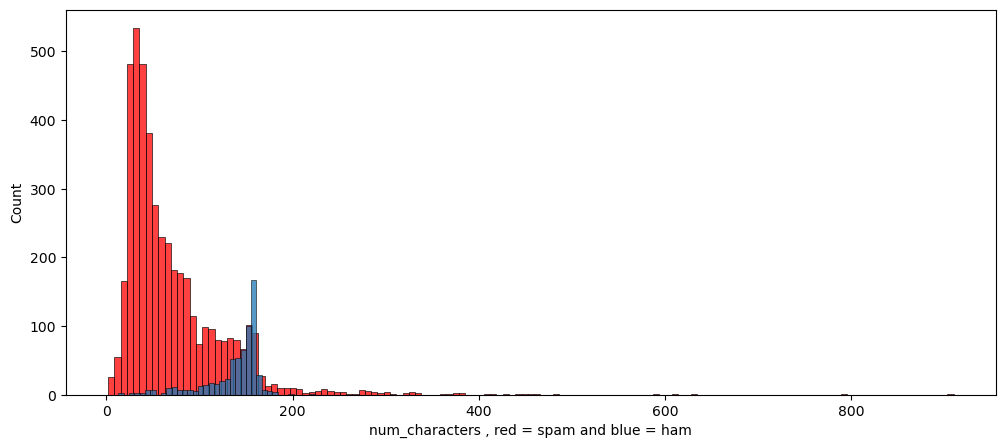

In [30]:
#potting histogram
import seaborn as sns
plt.figure(figsize = (12,5))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'red')
sns.histplot(df[df['target'] == 1]['num_characters'])
plt.xlabel('num_characters , red = spam and blue = ham')


C:\Users\SANDEEP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


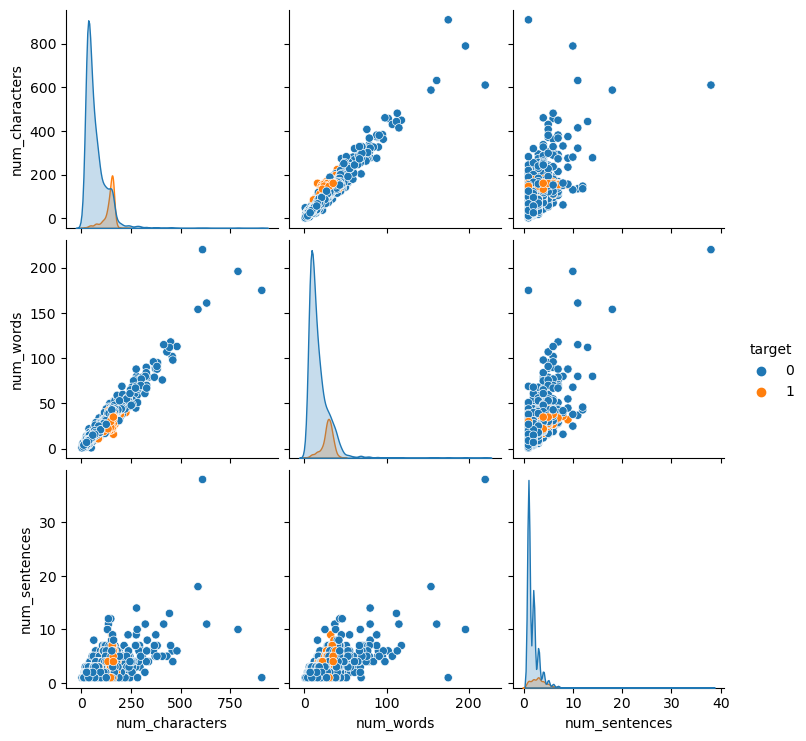

In [31]:
sns.pairplot(df, hue = 'target')

<Axes: >

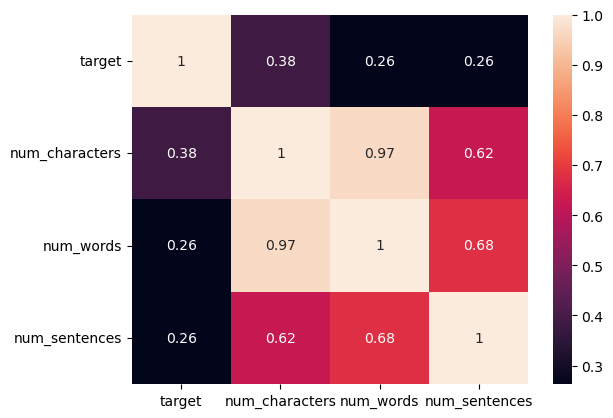

In [32]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Text Preprocessing

In [36]:
#tokenization
#removing stopwords
#stemming


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): # checking  and keeping alpha numeric and ignoring special characters
            y.append(i)
    
    text = y[:]  # Transfer contents of y to text and clear y
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Making wordcloud

In [39]:
!pip install wordcloud
from wordcloud import WordCloud


In [40]:
wc = WordCloud(width = 500 , height = 500 ,min_font_size = 10 , background_color = 'black')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

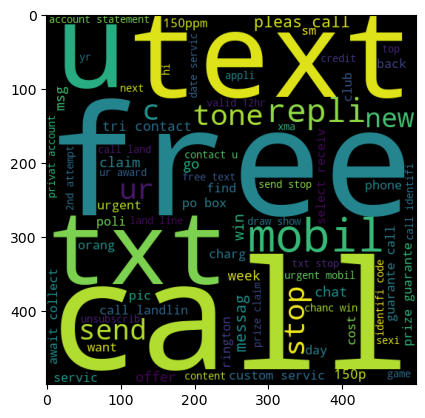

In [42]:
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

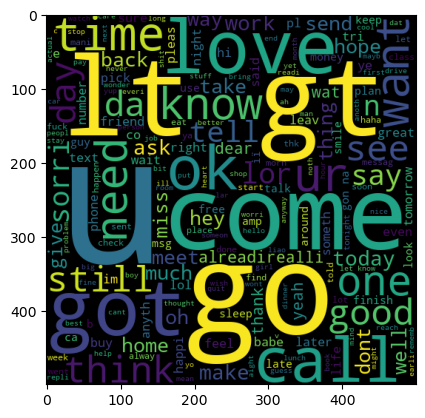

In [44]:
plt.imshow(ham_wc)

In [45]:
#calculating no of total number of words used in  spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        
        

In [46]:
len(spam_corpus)

9939

In [47]:
#getting top 30 words that are used max no  of times in spam classifciation
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


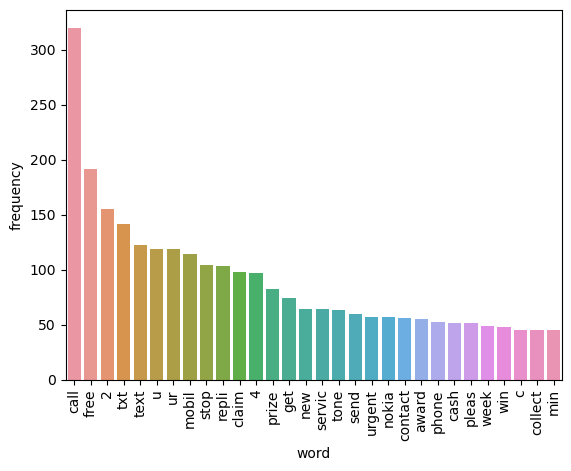

In [48]:
# now making bAR plot to visualize
spam_counter = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counter, columns=['word', 'frequency'])

sns.barplot(x='word', y='frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
#calculating no of total number of words used in  ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [50]:
len(ham_corpus)

35404

In [51]:
ham_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [52]:
ham_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


# Converting TEXTS INTO VECTORS

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features = 3000)

In [55]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 3000)

In [57]:
 y = df['target'].values

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2,random_state = 2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Training models

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
clf = RandomForestClassifier()

In [68]:
from sklearn.model_selection import GridSearchCV

# Using Grid Search CV

In [69]:
params = {rch.fit(X_train , y_train)
grid_sea
   'n_estimators' :[50,100,150,200,300],
    'criterion' : ['gini' ,'entropy'],
    'max_depth' : [3,6,5,10,20,30]
    
}

In [72]:
grid_search = GridSearchCV(estimator = clf, param_grid = params , cv= 4)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
y_pred4 = grid_search.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))